### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 8
### Due: Saturday, Apr 6th at 11.59pm CT
---

## Only one problem this week 

1. Use the following code snippet to read in SDSS galaxy color data.
<!--```
from astroML.datasets import fetch_sdss_galaxy_colors
data = fetch_sdss_galaxy_colors()
```-->

`data = np.load('../hw_data/hw8_data_1.npy')`

This is a structured numpy array. Find and print all of the column names. Using the data, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. How many regular galaxies and how many quasars are in this sample?


2. Make a scatter plot of $(u-g)$ versus $(g-r)$, color coding by galaxy or quasar class. The plot should include appropriate axis labels and a legend. Set `xlim` between -0.5 and 2.5, and `ylim` between -0.5 and 1.5.


3. Stack all colors and the redshift into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing.


4. Create a compact `for` loop that iterates over the fitting of a Gaussian Naive Bayes classification algorithm to successively more features of the data. Within the loop, compute and plot an ROC curve. The end result should be a plot showing ROC curves for GNB classification with more and more features of the data, with appropriate axis labels and a legend. Use `xlim` between 0 and 0.01. Which feature seems to make the classification trivially easy? *Note: `predict_proba` returns an array with as many columns as classes. You've labeled quasars as $1$, so for the ROC curve you must make sure to access the relevant quasar probability-- you can find this by accessing the **classes_** attribute of the estimator.*


5. Repeat (4) for Quadratic Discriminant Analysis. 


6. Let's try classification with GMM Bayes. Restrict the training and testing to be just on the $4$ colors. Iterate now over number of components in the GMM Bayes fit up to $10$, plotting ROC curves for all, and find the number of components that gives the best performance.


7. Repeat (6) for $K$-nearest neighbor classification, looping over number of neighbors between 5 and 100 in steps of 10. Find the number that gives the best performance. 


8. Repeat (6) for Decision Tree classification, looping over the maximum tree depth between 1 and 10. Find the number that gives the best performance. 


9. Finally, plot the ROC curves for GNB, QDA, and the best-performing GMMBayes, KNN, and DT classification algorithms, all using just the 4 colors. What is the overall best-performing classifier? 


10. Make a 2-panel plot, showing in the left panel the color-coded training data in $(u-g)$ versus $(g-r)$ (similar to item 2 above), and in the right panel the same features of the testing data color coded by their predicted class from the tuned best-performing classifier. 

This is a structured numpy array. Find and print all of the column names. Using the data, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. How many regular galaxies and how many quasars are in this sample?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

file = np.load('hw_data_cp/hw8_data_NicholasHoward.npy')
print(f'Column names: {file.dtype.names}')
feature_names = ['u-g', 'g-r', 'r-i', 'i-z', 'redshift']
# Create arrays based on color index/ redshifts
col_u_g = file['u'] - file['g']
col_g_r = file['g'] - file['r']
col_r_i = file['r'] - file['i']
col_i_z = file['i'] - file['z']

redshift = file['redshift']
redshift_err = file['redshift_err']
spec_class = file['specClass']

# Separate spectral class based on the type of event, but also make 0s and 1s indicate the type
spec_class[spec_class=='QSO'] = 1
spec_class[spec_class=='GALAXY'] = 0
spec_class = spec_class.astype(np.int64)

# Print the number of galaxies and quasars
print(f'\nNumber of Galaxies: {spec_class[spec_class==0].shape[0]} \nNumber of Quasars: {spec_class[spec_class==1].shape[0]}')

del file # Delete file to conserve memory 

Column names: ('u', 'g', 'r', 'i', 'z', 'specClass', 'redshift', 'redshift_err')

Number of Galaxies: 42808 
Number of Quasars: 7192


2. Make a scatter plot of $(u-g)$ versus $(g-r)$, color coding by galaxy or quasar class. The plot should include appropriate axis labels and a legend. Set `xlim` between -0.5 and 2.5, and `ylim` between -0.5 and 1.5.

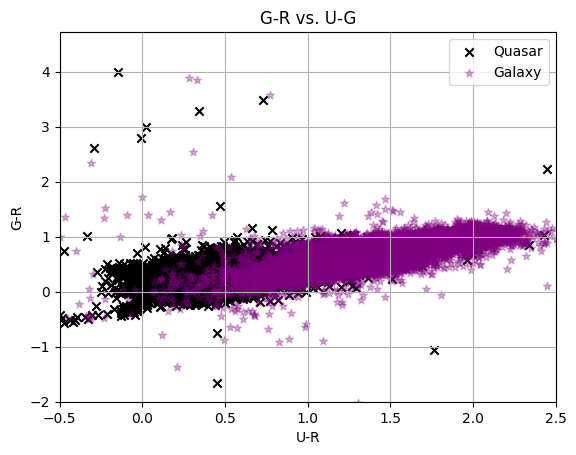

In [2]:
tab_ugr = np.column_stack([col_u_g,col_g_r,spec_class]) #Create sudo-table of the two used color indexes (Lazy coding)

# Plot the galaxies and quasars of the color index as you wished. 
plt.scatter(tab_ugr[spec_class==1][:,0], tab_ugr[spec_class==1][:,1],marker='x',label='Quasar',c='black')
plt.scatter(tab_ugr[spec_class==0][:,0], tab_ugr[spec_class==0][:,1],marker='*',label='Galaxy',alpha=0.3,c='purple')
plt.legend()
plt.grid()
plt.xlabel('U-R')
plt.ylabel('G-R')
plt.xlim(-0.5,2.5)
plt.ylim(-0.5-1.5)
plt.title('G-R vs. U-G');
del tab_ugr # Delete table to conserve memory 

3. Stack all colors and the redshift into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing.

In [3]:
from sklearn.model_selection import train_test_split

X = np.column_stack([col_u_g,col_g_r,col_r_i,col_i_z,redshift,spec_class]) #Create Matrix of the color indexes, redshifts, and labels.
X_train, X_test = train_test_split(X,test_size=0.2) #Create train and test samples of the matrix.
data_train, label_train = X_train[:,:-1], X_train[:,-1]
data_test, label_test = X_test[:,:-1], X_test[:,-1]
print(f'Training samples:\n {X_train[0:5]} \nTest samples:\n {X_test[0:5]}'); #Print shortend arrays.

Training samples:
 [[0.98382    0.3505     0.25508    0.17497    0.0607929  0.        ]
 [1.71737    0.81034    0.40939    0.2938     0.05527233 0.        ]
 [0.23066    0.30999    0.04078    0.42103    0.3640382  1.        ]
 [1.69172    0.82215    0.41316    0.31031    0.08144757 0.        ]
 [0.72804    0.31216    0.10728    0.1605     0.02112252 0.        ]] 
Test samples:
 [[1.18387    0.52836    0.24762    0.09629    0.03385943 0.        ]
 [1.8199     0.81223    0.38545    0.31617    0.05128127 0.        ]
 [1.60648    0.75969    0.37822    0.28217    0.03863117 0.        ]
 [0.97334    0.40622    0.25355    0.16656    0.1039918  0.        ]
 [1.11406    0.45876    0.29478    0.22626    0.04219995 0.        ]]


4. Create a compact for loop that iterates over the fitting of a Gaussian Naive Bayes classification algorithm to successively more features of the data. Within the loop, compute and plot an ROC curve. The end result should be a plot showing ROC curves for GNB classification with more and more features of the data, with appropriate axis labels and a legend. Use xlim between 0 and 0.01. Which feature seems to make the classification trivially easy? Note: predict_proba returns an array with as many columns as classes. You've labeled quasars as 
, so for the ROC curve you must make sure to access the relevant quasar probability-- you can find this by accessing the classes_ attribute of the estimator.

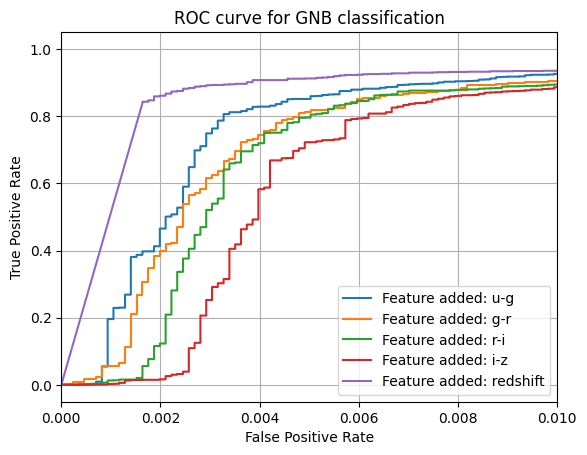

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve

gnb = GaussianNB() # Load Gaussian Naive Bayes
[plt.plot(roc_curve(label_test, gnb.fit(data_train[:,0:ind], label_train).predict_proba(data_test[:,0:ind])[:,1])[0],
          roc_curve(label_test, gnb.fit(data_train[:,0:ind], label_train).predict_proba(data_test[:,0:ind])[:,1])[1],
         label=f'Feature added: {feature_names[ind-1]}')
 for ind in range(1,data_train.shape[1]+1)] # Compact for-loop making ROC curve for every feature added to the fit and models

# Image format stuff
plt.xlim(0,0.01)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for GNB classification')
plt.legend()
plt.show();
# Adding redshift makes this almost trivial, but adding colors worsens model weird....

5. Repeat (4) for Quadratic Discriminant Analysis. 

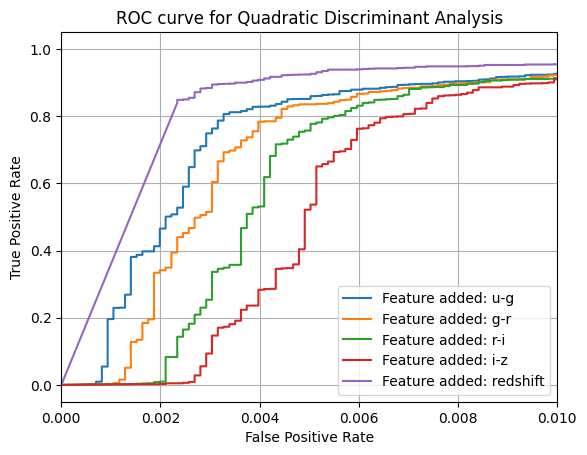

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis() # Load Gaussian Naive Bayes
[plt.plot(roc_curve(label_test, qda.fit(data_train[:,0:ind], label_train).predict_proba(data_test[:,0:ind])[:,1])[0],
          roc_curve(label_test, qda.fit(data_train[:,0:ind], label_train).predict_proba(data_test[:,0:ind])[:,1])[1],
         label=f'Feature added: {feature_names[ind-1]}')
 for ind in range(1,data_train.shape[1]+1)] # Compact for loop making ROC curve for every feature added to the fit and models

# Image format stuff
plt.xlim(0,0.01)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Quadratic Discriminant Analysis')
plt.legend()
plt.show();
# Adding redshift makes this almost trivial, but adding colors worsens model weird....

6. Let's try classification with GMM Bayes. Restrict the training and testing to be just on the $4$ colors. Iterate now over number of components in the GMM Bayes fit up to $10$, plotting ROC curves for all, and find the number of components that gives the best performance.

In [6]:
X = np.column_stack([col_u_g,col_g_r,col_r_i,col_i_z,spec_class]) # Create same data matrix as in (4) but without redshift
X_train, X_test = train_test_split(X,test_size=0.2) # Train test split function 

# Separate data from labels
data_train, data_test = X_train[:,:-1], X_test[:,:-1] 
label_train, label_test = X_train[:,-1], X_test[:,-1]

Best ROC curve with number of components : 5


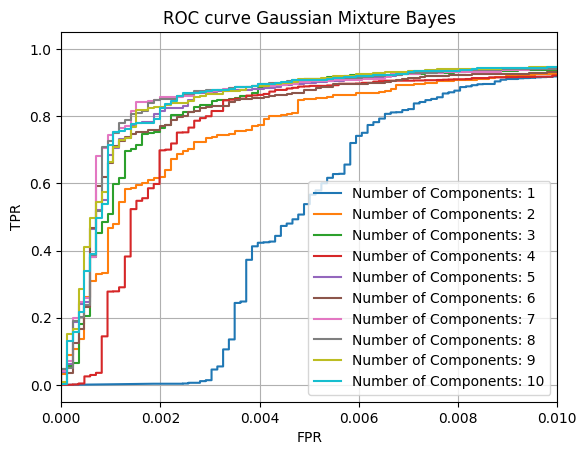

In [7]:
from astroML.classification import GMMBayes
from sklearn.metrics import roc_auc_score

Areas = np.zeros((10,2))
for ind in range(1,11):
    GMM = GMMBayes(n_components=ind) # Increase number of components with every iteration
    label_score = GMM.fit(data_train,label_train).predict_proba(data_test)[:,1] # Score the fit / model 
    fpr, tpr, thresh  = roc_curve(label_test, label_score)
    Areas[ind-1] = roc_auc_score(label_test, label_score), ind # Score ROC curve
    plt.plot(fpr, tpr, label = f'Number of Components: {ind}') # Plot ROC
    
print(f'Best ROC curve with number of components : {int(Areas[Areas[:,0] == Areas[:,0].max()][0][1])}')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Gaussian Mixture Bayes')
plt.xlim(0,0.01)
plt.grid()
plt.show();

7. Repeat (6) for $K$-nearest neighbor classification, looping over number of neighbors between 5 and 100 in steps of 10. Find the number that gives the best performance. 

Best ROC curve with number of neighbors : 95


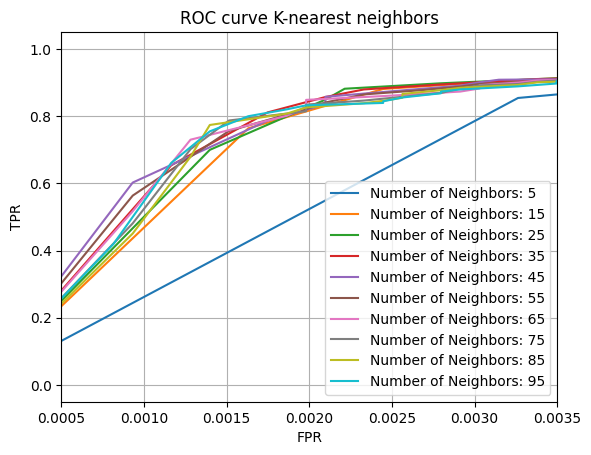

In [8]:
from sklearn.neighbors import KNeighborsClassifier

Areas = np.zeros((10,2))
for num, ind in enumerate(range(5,101,10)):
    KNC = KNeighborsClassifier(n_neighbors=ind) # Increase number of neighbors with every iteration
    label_score = KNC.fit(data_train,label_train).predict_proba(data_test)[:,1]
    fpr, tpr, thresh  = roc_curve(label_test, label_score)
    Areas[num] = roc_auc_score(label_test,label_score), ind # integrating, (dx * dy) and sum the rectangles for area under curve
    plt.plot(fpr, tpr, label = f'Number of Neighbors: {ind}') # Plot ROC
    
print(f'Best ROC curve with number of neighbors : {int(Areas[Areas[:,0] == Areas[:,0].max()][0][1])}')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve K-nearest neighbors')
plt.xlim(0.0005,0.0035)
plt.grid()
plt.show();

8. Repeat (6) for Decision Tree classification, looping over the maximum tree depth between 1 and 10. Find the number that gives the best performance. 

Best ROC curve with tree depth : 6


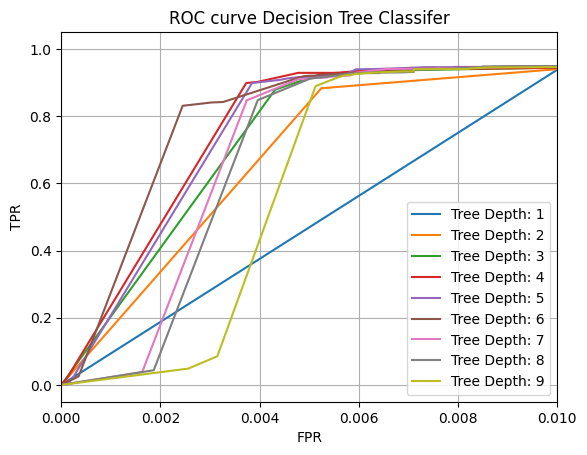

In [9]:
from sklearn.tree import DecisionTreeClassifier

Areas = np.zeros((10,2))
for ind in range(1,10):
    DCT = DecisionTreeClassifier(max_depth=ind) # Increase number of neighbors with every iteration
    label_score = DCT.fit(data_train,label_train).predict_proba(data_test)[:,1]
    fpr, tpr, thresh  = roc_curve(label_test, label_score)
    Areas[ind-1] = roc_auc_score(label_test,label_score), ind # integrating, (dx * dy) and sum the rectangles for area under curve
    plt.plot(fpr, tpr, label = f'Tree Depth: {ind}') # Plot ROC

print(f'Best ROC curve with tree depth : {int(Areas[Areas[:,0] == Areas[:,0].max()][0][1])}')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Decision Tree Classifer')
plt.xlim(0,0.01)
plt.grid()
plt.show();
# I would say 5, it has the steepest slope

9. Finally, plot the ROC curves for GNB, QDA, and the best-performing GMMBayes, KNN, and DT classification algorithms, all using just the 4 colors. What is the overall best-performing classifier? 

In [10]:
# Load data and essential packages
import numpy as np
import matplotlib.pyplot as plt

file = np.load('hw_data_cp/hw8_data_NicholasHoward.npy')
# Create arrays based on color index/ redshifts
col_u_g = file['u'] - file['g']
col_g_r = file['g'] - file['r']
col_r_i = file['r'] - file['i']
col_i_z = file['i'] - file['z']

spec_class = file['specClass']

# Separate spectral class based on the type of event, but also make 0s and 1s indicate the type
spec_class[spec_class=='QSO'] = 1
spec_class[spec_class=='GALAXY'] = 0
spec_class = spec_class.astype(np.int64)

del file # Delete file to conserve memory 



# Load tts and split data 
from sklearn.model_selection import train_test_split

X = np.column_stack([col_u_g,col_g_r,col_r_i,col_i_z,spec_class]) #Create Matrix of the color indexes, redshifts, and labels.
X_train, X_test = train_test_split(X,test_size=0.2) #Create train and test samples of the matrix.
data_train, label_train = X_train[:,:-1], X_train[:,-1] # Training data
data_test, label_test = X_test[:,:-1], X_test[:,-1] # Testing data


# Load Models
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from astroML.classification import GMMBayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Load analysis tools 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

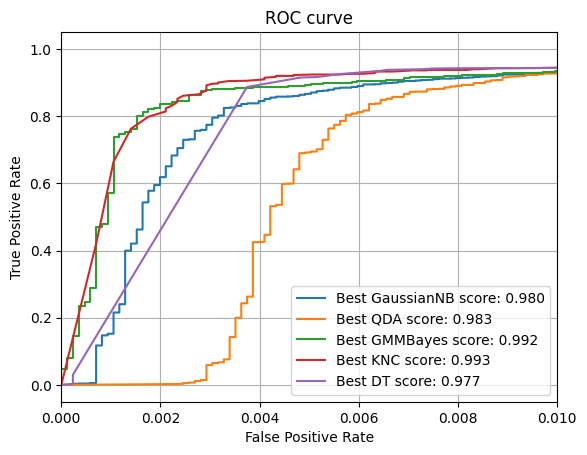

In [11]:
roc_score = np.zeros(5)

# GaussianNB
gnb = GaussianNB() # Load Gaussian Naive Bayes
scorin = np.zeros(data_train.shape[1]+1)

for ind in range(1, data_train.shape[1]+1):
    label_score = gnb.fit(data_train[:,0:ind], label_train).predict_proba(data_test[:,0:ind])[:,1]  
    scorin[ind-1] = roc_auc_score(label_test, label_score) #Get score
    
best_roc = np.where(scorin==scorin.max())[0][0] # Find the highest score and plot the roc with those parameters
label_score = gnb.fit(data_train[:,0:best_roc+1], label_train).predict_proba(data_test[:,0:best_roc+1])[:,1]
fpr, tpr, thresh = roc_curve(label_test, label_score)
roc_score[0] = scorin[best_roc]
plt.plot(fpr, tpr, label = f'Best GaussianNB score: {roc_score[0]:.3f}')

# QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis() # model
scorin = np.zeros(data_train.shape[1]+1)

for ind in range(1, data_train.shape[1]+1):
    label_score = model.fit(data_train[:,0:ind], label_train).predict_proba(data_test[:,0:ind])[:,1]
    scorin[ind-1] = roc_auc_score(label_test, label_score)
    
best_roc = np.where(scorin==scorin.max())[0][0]
label_score = model.fit(data_train[:,0:best_roc+1], label_train).predict_proba(data_test[:,0:best_roc+1])[:,1]
fpr, tpr, thresh = roc_curve(label_test, label_score)
roc_score[1] = scorin[best_roc]
plt.plot(fpr, tpr, label = f'Best QDA score: {roc_score[1]:.3f}')

# GMMBayes
scorin = np.zeros(10)

for ind in range(1,11):
    model = GMMBayes(n_components=ind)
    label_score = model.fit(data_train, label_train).predict_proba(data_test)[:,1]
    scorin[ind-1] = roc_auc_score(label_test, label_score)
    
best_roc = np.where(scorin==scorin.max())[0][0]
n_comps_best = best_roc
model = GMMBayes(n_components=best_roc+1)
label_score = model.fit(data_train, label_train).predict_proba(data_test)[:,1]
fpr, tpr, thresh = roc_curve(label_test, label_score)
roc_score[2] = scorin[best_roc]
plt.plot(fpr, tpr, label = f'Best GMMBayes score: {roc_score[2]:.3f}')

# KNeighborsClassifier
scorin = np.zeros(10)

for num, ind in enumerate(range(5,101,10)):
    model = KNeighborsClassifier(n_neighbors=ind)
    label_score = model.fit(data_train, label_train).predict_proba(data_test)[:,1]
    scorin[num] = roc_auc_score(label_test, label_score)
    
best_roc = np.where(scorin==scorin.max())[0][0]
model = KNeighborsClassifier(n_neighbors=5 + (num * 10))
label_score = model.fit(data_train, label_train).predict_proba(data_test)[:,1]
fpr, tpr, thresh = roc_curve(label_test, label_score)
roc_score[3] = scorin[best_roc]
plt.plot(fpr, tpr, label = f'Best KNC score: {roc_score[3]:.3f}')

# DecisionTreeClassifier
scorin = np.zeros(10)

for ind in range(1,11):
    model = DecisionTreeClassifier(max_depth=ind)
    label_score = model.fit(data_train, label_train).predict_proba(data_test)[:,1]
    scorin[ind-1] = roc_auc_score(label_test, label_score)
    
best_roc = np.where(scorin==scorin.max())[0][0]
model = DecisionTreeClassifier(max_depth=best_roc+1)
label_score = model.fit(data_train, label_train).predict_proba(data_test)[:,1]
fpr, tpr, thresh = roc_curve(label_test, label_score)
roc_score[4] = scorin[best_roc]
plt.plot(fpr, tpr, label = f'Best DT score: {roc_score[4]:.3f}')


# # Image format stuff
plt.xlim(0,0.01);
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show();
# Adding redshift makes this almost trivial, but adding colors worsens model weird....

GMMBayes is the best classifier

10. Make a 2-panel plot, showing in the left panel the color-coded training data in $(u-g)$ versus $(g-r)$ (similar to item 2 above), and in the right panel the same features of the testing data color coded by their predicted class from the tuned best-performing classifier. 

Text(0.02, 0.5, 'G-R')

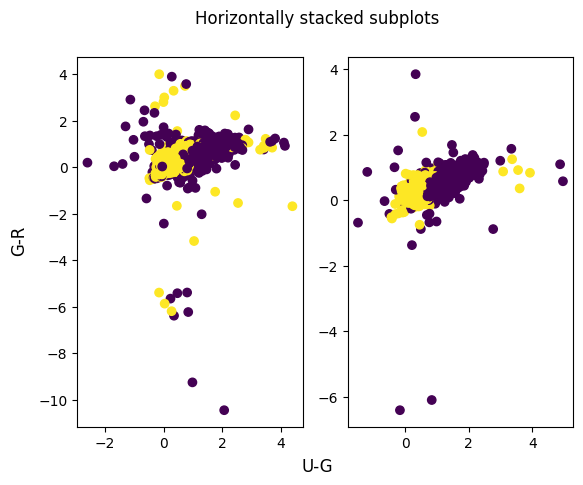

In [12]:
label_predict = GMMBayes(n_components=n_comps_best).fit(data_train,label_train).predict(data_test)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.scatter(data_train[:,0], data_train[:,1], c=label_train)
ax2.scatter(data_test[:,0], data_test[:,1], c=label_predict)

fig.supxlabel('U-G')
fig.supylabel('G-R')

# Adding colorbar is stressful...

In [13]:
# ###Not sure how to get this function going so I gave up 

# def Find_best_ROC(train_data, test_data, iters, model,iter_model=False,it_val=iters):
#     if iter_model == False:
#         for ind in range(1, iters):
#             label_score = model.fit(train_data[0][:,0:ind], train_data[1]).predict_proba(test_data[0][:,0:ind])[:,1]
#             fpr, tpr, thresh = roc_curve(test_data[1], label_score)
#             roc_score[ind] = roc_auc_score(test_data[1], label_score)
#             if roc_score[ind] > roc_score[ind-1]:
#                 FPR, TPR, Thresh = np.copy(fpr), np.copy(tpr), np.copy(thresh)
#         return FPR, TPR, roc_score.max()
        
#     elif iter_model == True:
#         for ind in range(1, iters):
#             model = model(ind)
#             label_score = model.fit(train_data[0][:,0:ind], train_data[1]).predict_proba(test_data[0][:,0:ind])[:,1]
#             fpr, tpr, thresh = roc_curve(test_data[1], label_score)
#             roc_score[ind] = roc_auc_score(test_data[1], label_score)
#             if roc_score[ind] > roc_score[ind-1]:
#                 FPR, TPR, Thresh = np.copy(fpr), np.copy(tpr), np.copy(thresh)
#         return FPR, TPR, roc_score.max()        

# iters = 10
# train_data = data_train, label_train
# test_data = data_test, label_test
# it_val = np.linspace(1,iters,iters)
# model = GMMBayes(it_val)
#Find_best_ROC(train_data, test_data, iters, model,iter_model=False,it_val=iters)
#FPR, TPR, roc_score = ROC_test(model, iters, train_data, test_data)